In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
import pandas as pd

In [24]:
df_train = pd.read_csv("../model_amp/model_0710/X_train.csv")
df_val = pd.read_csv("../model_amp/model_0710/X_val.csv")
df_test = pd.read_csv("../model_amp/model_0710/X_test.csv")

In [25]:
df_train["label"].value_counts()

label
0    7641
1    7637
Name: count, dtype: int64

In [26]:
df_val["label"].value_counts()

label
1    1913
0    1907
Name: count, dtype: int64

In [27]:
df_test["label"].value_counts()

label
0    1062
1    1060
Name: count, dtype: int64

In [28]:
X_train = df_train.drop(columns=["label"])
y_train = df_train["label"].values

X_val = df_val.drop(columns=["label"]).values
y_val = df_val["label"].values

X_test = df_test.drop(columns=["label"]).values
y_test = df_test["label"].values

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay, f1_score, recall_score, matthews_corrcoef, precision_score

In [31]:
logistic_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier()
gausian_nb_model = GaussianNB()
svc_model = SVC(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

In [32]:
random_forest_model.fit(X=X_train, y=y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
y_val_predict = random_forest_model.predict(X_val)
y_test_predict = random_forest_model.predict(X_test)


In [34]:
confusion_matrix(y_true=y_val, y_pred=y_val_predict)

array([[1450,  457],
       [ 549, 1364]])

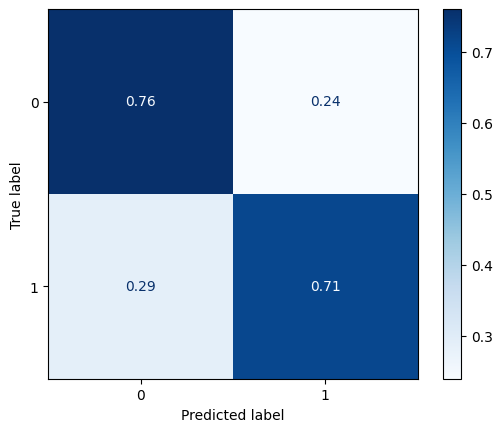

In [35]:
ConfusionMatrixDisplay.from_estimator(
    random_forest_model,
    X_val,
    y_val,
    normalize="true",
    cmap="Blues"
)